# file sizes, number of hits and cdf

In [ ]:
import glob
filenames = glob.glob('/INET/state-trolls/work/state-trolls/reddit_dataset/comments/scores/RC_2016-10.bz2.decompressed/*txt')

In [ ]:
sims = []

In [ ]:
for name in filenames:
    try:
        with open(name , 'r') as content_file:
            content = content_file.read()
            json_data = content.replace('][',',')
            j_object = json.loads(json_data)
            j_df = pd.DataFrame(j_object)
            counts = collections.Counter(j_df['tweet_id'].tolist())
            counts_sorted = counts.most_common()
            c_df = pd.DataFrame(counts_sorted, columns=['tweet_id', 'frequency'])
            final_df = final_df.append(c_df, ignore_index = True) 
            final_df['t_f'] = final_df.groupby(['tweet_id'])['frequency'].transform('sum')
            final_df = final_df.drop_duplicates(subset=['tweet_id'])
            del final_df['frequency']
            final_df.columns = ['tweet_id', 'frequency']
#             print(final_df.head())
#             print(len(final_df))
            i = i + 1
            print(i)
    except:
        no_hits_files = no_hits_files + 1

In [ ]:
print(no_hits_files)
print(hits_files)
print(no_of_hits)

In [ ]:
import json
import pandas as pd
with open('/INET/state-trolls/work/state-trolls/reddit_dataset/comments/scores/RC_2016-10.bz2.decompressed/7076_scores_stsb.txt' , 'r') as content_file:
        size = content_file.tell()
        content = content_file.read()
        json_data = content.replace('][',',')
        j_object = json.loads(json_data)
        j_df = pd.DataFrame(j_object)
        print(j_df.shape[0])

# CDF plot and theme distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import collections
counts, bin_edges = np.histogram (sims, bins=20, normed=False)
cdf = np.cumsum (counts)
plt.plot(bin_edges[1:], cdf/cdf[-1])
plt.xlabel('cosine similarity')
plt.ylabel('3M hits')

In [ ]:
data = pd.read_csv('./clustering/annotated/combined_annotated_updated1.csv')

In [ ]:
relevant_data = data[data['relevance']==1]

In [ ]:
relevant_data.head()

In [ ]:
count = 0
counts = []
labels = ['Muslims', 'Racism', 'Elections','Michel Obama', 'Congress','Islam', 'Zimbabwe', 'Cop Violence',
         'White House', 'UK', 'Republicans', ' Barack Obama', 'Hilary Clinton', 'Trump', 'Protests/Rallies',
         'Biden', 'Democratics', 'US Gov', 'Gen Politics', 'LGBTQ', 'ISIS', 'China', 'Kenya', 'Russia', 'Korea',
         'Syria', 'Abortion', 'Miscellaneous','Sanders/Cruz','Israel','Liberals', 'Iran', 'Germany', 'Greek', 
          'Flint water crisis','Turkey','Pakistan','Bill Cosby','Gun law', 'James Comey','Climate change',
          'India','Columbia','Ferguson','No cyber censorship movement',
          'Brazil','Saudi -Yemen','Belgium','Panama','Religion','Europe','Mexico','Baltimore',
          'Paris climate deal','Afghan  - Taliban','Australia','Cuba','Italy']
for i in range(1,59):
    shape = relevant_data[relevant_data['theme'] == i].shape
    counts.append(shape[0])
    count =  count + shape[0]
print(count)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.style.use('ggplot')
df = pd.DataFrame()
df['counts'] = counts
df['labels'] = labels
df = df.sort_values('counts', ascending=False)
df.set_index('labels', inplace=True)
fig, ax = plt.subplots(figsize=(7,10))
df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Themes')

# Temporal Analysis

In [ ]:
import numpy as np 
import pandas as pd
import csv
import os
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random
import emoji
import string
import json
import nltk

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

# list of all the dataset files
dataset_paths = ["../../datasets/russia_052020_tweets_csv_hashed_2.csv", 
         "../../datasets/russian_linked_tweets_csv_hashed.csv", 
         "../../datasets/ira_tweets_csv_hashed.csv", 
         "../../datasets/russia_201906_1_tweets_csv_hashed.csv"]

# path to store the entire combined dataset
combined_dataset_path = "../datasets/russian_trolls.csv"

# returns a pandas dataframe consisting of entries from all the dataset files
def get_combined_dataset(paths):
    data = pd.concat((pd.read_csv(file) for file in tqdm(paths)))
    return data

data = get_combined_dataset(dataset_paths)
print("Number of tweets in the dataset: ", data.shape[0])


In [ ]:
data.columns

# Get samples for annotation

In [ ]:
final_annotations = pd.DataFrame()

In [ ]:
adf = pd.read_csv('./annotations/2016.11.annotation_data_point_95.csv')

In [ ]:
adf.shape

In [ ]:
res = adf[~adf[['tweet', 'matching_sentence']].apply(frozenset, axis=1).duplicated()]


In [ ]:
res = res[~res[['tweet']].apply(frozenset, axis=1).duplicated()]

In [ ]:
res = res[~res[['matching_sentence']].apply(frozenset, axis=1).duplicated()]

In [ ]:
res.shape

In [ ]:
final_annotations = final_annotations.append(res.sample(n = 10))

In [ ]:
final_annotations.shape

In [ ]:
del final_annotations['Unnamed: 0']

In [ ]:
fdf = final_annotations.sample(n=170)

In [ ]:
fdf['annotation_based_on_sentence'] = 2
fdf['annotation_based_on_post'] = 2

In [ ]:
fdf.shape

In [ ]:
pdf = pd.read_csv('./annotation_samples_saved.csv')

In [ ]:
fdf = pdf.append(fdf, ignore_index=True)

In [ ]:
pdf.shape

In [ ]:
fdf.to_csv('./annotations/annotation_samples.csv')

# Threshold matrix

In [ ]:
odf = fdf

In [ ]:
odf.head()

In [ ]:
df = pd.read_csv('./clustering/annotated/annotation_samples_aishwarya.csv')

In [ ]:
odf['annotation_based_on_sentence'] = df['annotation_based_on_sentence'].values

In [ ]:
odf['annotation_based_on_post'] = df['annotation_based_on_post'].values

In [ ]:
print(odf[(odf['sim'] > 0.65) & (odf['sim'] <= 0.7)].shape)
print(odf[(odf['sim'] > 0.7) & (odf['sim'] <= 0.75)].shape)
print(odf[(odf['sim'] > 0.75) & (odf['sim'] <= 0.8)].shape)
print(odf[(odf['sim'] > 0.8) & (odf['sim'] <= 0.85)].shape)
print(odf[(odf['sim'] > 0.85) & (odf['sim'] <= 0.9)].shape)
print(odf[(odf['sim'] > 0.9) & (odf['sim'] <= 0.95)].shape)
print(odf[(odf['sim'] > 0.95) & (odf['sim'] <= 1.0)].shape)

In [ ]:
odf.to_csv('./annotation_samples_saved.csv')

In [ ]:
odf = pd.read_csv('./annotation_samples_aishwarya.csv')

In [ ]:
sdf = odf[odf['annotation_based_on_post'].notnull()]

In [ ]:
import numpy as np
matrix_0 = []
matrix_1 = []
from sklearn.metrics import classification_report
target_names = ['irrelevant', 'relevant']
for threshold in np.arange(0.65, 1.0, 0.05):
    sdf['true-values'] = np.where(sdf['sim'] > threshold, 1, 0)
    c = classification_report(sdf['true-values'],
                              sdf['annotation_based_on_post'], target_names=target_names, output_dict = True)
    matrix_0.append({'threshold': threshold, 'class': '0',
                   'precision' : (c['irrelevant'])['precision'],
                  'recall': (c['irrelevant'])['recall'],
                  'f1-score': (c['irrelevant'])['f1-score'],
                  'support': (c['irrelevant'])['support'],
                  'accuracy': c['accuracy']})
    matrix_1.append({'threshold': threshold, 'class': '1',
                   'precision' : (c['relevant'])['precision'],
                  'recall': (c['relevant'])['recall'],
                  'f1-score': (c['relevant'])['f1-score'],
                  'support': (c['relevant'])['support'],
                  'accuracy': c['accuracy']})
#     print(c)

In [ ]:
k = pd.DataFrame(matrix_1)
del k['support']
k

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import collections
counts, bin_edges = np.histogram (sims, bins=500, normed=False)
cdf = np.cumsum (counts)
plt.plot(bin_edges[1:], cdf/cdf[-1])
plt.xlabel('ratio of post length to max tweet length')
plt.ylabel('randomized hits')

In [ ]:
def plot_cdf(list_counts, xlabel, path, leg=False, islogx=True, xlimit=False):
    t_col = "#235dba"
    g_col = "#005916"
    c_col = "#a50808"
    r_col = "#ff9900"
    black = "#000000"
    pink = "#f442f1"
    t_ls = '-'
    r_ls = '--'
    c_ls = ':'
    g_ls = '-.'

    markers = [".", "o", "v", "^", "<", ">", "1", "2"]
    colors = [t_col, c_col, g_col, r_col, black, 'c', 'm', pink]
    line_styles = [t_ls, r_ls, c_ls, g_ls,t_ls, r_ls, c_ls, g_ls, t_ls]
    colors = colors[1:]
    line_styles= line_styles[1:]
    while(len(list_counts) > len(colors)):
        colors = colors + shuffle(colors)
        line_styles = line_styles + shuffle(line_styles)
        
    if xlimit:
        l2 = []
        for l in list_counts:
            l2_1 = [x for x in l if x<=xlimit]
            l2.append(l2_1)
        list_counts = l2
    
    for l in list_counts:
        l.sort()
    fig, ax = plt.subplots(figsize=(6,4))
    yvals = []
    for l in list_counts:
        yvals.append(np.arange(len(l))/float(len(l)-1))
    for i in range(len(list_counts)):
        ax.plot(list_counts[i], yvals[i], color=colors[i], linestyle=line_styles[i])
    if islogx:
        ax.set_xscale("log")
    plt.xlabel(xlabel)
    plt.ylabel('CDF')
    plt.grid()
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    
    if leg:
        plt.legend(leg, loc='best', fontsize=13)
    
    plt.show()
    fig.savefig(path, bbox_inches='tight')


In [ ]:
plot_cdf([sims], 'ratio', './cdf_of_ratio_of_tweet_lengths.pdf', islogx=False)

# Getting samples with sim  > 0.8 along with the time difference

In [ ]:
combined_annotation = pd.DataFrame()

In [ ]:
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.10.annotation_data_point_8.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.10.annotation_data_point_85.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.10.annotation_data_point_9.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.10.annotation_data_point_95.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.11.annotation_data_point_8.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.11.annotation_data_point_85.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.11.annotation_data_point_9.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2016.11.annotation_data_point_95.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2017.04.annotation_data_point_8.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2017.04.annotation_data_point_85.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2017.04.annotation_data_point_9.csv'), ignore_index = True)
combined_annotation = combined_annotation.append(pd.read_csv('./annotations/2017.04.annotation_data_point_95.csv'), ignore_index = True)

res = combined_annotation[~combined_annotation[['tweet_text', 'matching_sentence']].apply(frozenset, axis=1).duplicated()]
res = res[~res[['tweet_text']].apply(frozenset, axis=1).duplicated()]
res = res[~res[['matching_sentence']].apply(frozenset, axis=1).duplicated()]

In [ ]:
res = combined_annotation

In [ ]:
fdata = data[data['tweetid'].isin(res['tweet_id'].to_list())]

In [ ]:
times = []
for idx, row in res.iterrows():
    element = fdata[fdata['tweetid'] == row['tweet_id']]
    time = element['tweet_time'].to_string()
    time = time.split()
#     print(time[1]+' '+time[2])
    times.append(time[1]+' '+time[2])

In [ ]:
# del res['tweet_time']
res['tweet_time'] = times

In [ ]:
rel_posts = pd.DataFrame()

In [ ]:
posts = pd.read_csv('/INET/state-trolls/work/state-trolls/reddit_dataset/comments/posts/posts-2016-10.csv')
fposts = posts[posts['id'].isin(res['post_id'].to_list())]
rel_posts = rel_posts.append(fposts, ignore_index=True)
posts = pd.read_csv('/INET/state-trolls/work/state-trolls/reddit_dataset/comments/posts/posts-2016-11.csv')
fposts = posts[posts['id'].isin(res['post_id'].to_list())]
rel_posts = rel_posts.append(fposts, ignore_index=True)
posts = pd.read_csv('/INET/state-trolls/work/state-trolls/reddit_dataset/comments/posts/posts-2017-04.csv')
fposts = posts[posts['id'].isin(res['post_id'].to_list())]
rel_posts = rel_posts.append(fposts, ignore_index=True)
                             

In [ ]:
import datetime
times = []
for idx, row in res.iterrows():
    element = rel_posts[rel_posts['id'] == row['post_id']]
    time = element['created_utc'].astype('int64')
    time = str(time).split()
#     print(time)
    try:
        times.append(datetime.datetime.fromtimestamp(int(time[1])))
    except ValueError:
        print(time[0])
        times.append(time[0])

In [ ]:
res = res[res['post_time'] !=  'Series([],']

In [ ]:
del res['post_time']
res['post_time'] = times

In [ ]:
t = pd.to_datetime(res.tweet_time, infer_datetime_format=True)

In [ ]:
del res['tweet_time']
res['tweet_time'] = t

In [ ]:
t = pd.to_datetime(res.post_time, infer_datetime_format=True)
del res['post_time']
res['post_time'] = t

In [ ]:
td = (res.post_time - res.tweet_time).astype('timedelta64[h]')

In [ ]:
res['time_difference'] = td

In [ ]:
res.to_csv('./annotations/combinedpoint8.csv')

# CDF of time difference between post and tweets of all the hits so far

In [ ]:
combined_times =pd.DataFrame()

In [ ]:
twitter_data = pd.read_csv('./relevant_tweets.csv')
twitter_data.shape

In [ ]:
reddit_data = pd.read_csv('/INET/state-trolls/work/state-trolls/reddit_dataset/comments/posts/posts-2017-04.csv')
reddit_data.shape

In [ ]:
hits = pd.read_csv('./results/combined_hits_2017.04.csv')

In [ ]:
hits = hits.rename(columns={'tweet_time': 'post_time'})
del hits['Unnamed: 0']

In [ ]:
hits.dtypes

In [ ]:
hits = hits[hits['post_time'] != 'Series([],']

In [ ]:
hits.shape

In [ ]:
fdata = data[data['tweetid'].isin(hits['tweet_id'].unique())]

In [ ]:
fdata.shape

In [ ]:
times = []
authors = []
for idx, row in hits.iterrows():
    element = fdata[fdata['tweetid'] == row['tweet_id']]
    time = element['tweet_time'].to_string()
    time = time.split()
#     print(time[1]+' '+time[2])
    times.append(time[1]+' '+time[2])
#     authors.append(row[''])

In [ ]:
len(times)

In [ ]:
hits['tweet_time'] = times

In [ ]:
hits[hits['tweet_time'] == 'Series([],'].shape

In [ ]:
t = pd.to_datetime(hits.tweet_time, infer_datetime_format=True)
del hits['tweet_time']
hits['tweet_time'] = t


In [ ]:
t = pd.to_datetime(hits.post_time, infer_datetime_format=True)
del hits['post_time']
hits['post_time'] = t

In [ ]:
td = (hits.post_time - hits.tweet_time).astype('timedelta64[h]')

In [ ]:
hits['td'] = td

In [ ]:
combined_times = combined_times.append(hits)

In [ ]:
td = (combined_times.post_time - combined_times.tweet_time).astype('timedelta64[h]')
del combined_times['td']
combined_times['td'] = td

In [ ]:
combined_times[combined_times['td'] == 0].shape

In [ ]:
combined_times.head()

In [ ]:
plot_cdf([combined_times['td'].to_list()], 'time difference in seconds', './cdf_of_time_difference_hits_seconds.pdf', islogx=True)

# Time difference analysis for users

In [ ]:
author_td_df = pd.DataFrame()
authors_tds = []

In [ ]:
authors = hits['author'].unique()

In [ ]:
hits.shape

In [ ]:
len(authors)

In [ ]:
import numpy as np
for a in authors:
    tds = combined_times[hits['author']==a]['td'].to_list()
    avg_td = np.mean(tds)
    authors_tds.append({'author': a, 'atd': avg_td})

In [ ]:
len(authors_tds)

In [ ]:
author_td_df = pd.DataFrame(authors_tds)

In [ ]:
plot_cdf([author_td_df['atd'].to_list()], 'time difference in hours', './cdf_of_avg_time_difference_per_author_log.pdf', islogx=False)

# plot cdf of posts per author with time difference 1w, 2w , 1m

In [1116]:
combined_hits = pd.DataFrame()

In [1122]:
hits = pd.read_csv('./results/combined_hits_2017.04.csv')

In [1123]:
combined_hits = combined_hits.append(hits, ignore_index=True)

In [1124]:
hits = combined_hits

In [1125]:
hits = hits.rename(columns={'tweet_time': 'post_time'})
del hits['Unnamed: 0']

In [1126]:
authors = []
for a in hits['author']:
    s = a.split()
    authors.append(s[1])

In [1127]:
del hits['author']
hits['author'] = authors

In [1133]:
times = []
for idx, row in hits.iterrows():
    element = fdata[fdata['tweetid'] == row['tweet_id']]
    time = element['tweet_time'].to_string()
    time = time.split()
    try:
        times.append(time[1]+' '+time[2])
    except IndexError:
        times.append(time[0])

In [1134]:
hits['tweet_time'] = times

In [1135]:
hits = hits[hits['tweet_time'] != 'Series([],']

In [1136]:
hits = hits[hits['post_time'] != 'Series([],']

In [1137]:
t = pd.to_datetime(hits.tweet_time, infer_datetime_format=True)
del hits['tweet_time']
hits['tweet_time'] = t
t = pd.to_datetime(hits.post_time, infer_datetime_format=True)
del hits['post_time']
hits['post_time'] = t

In [1138]:
td = (hits.post_time - hits.tweet_time).astype('timedelta64[h]')
hits['td'] = td

In [1139]:
hits.shape

(837036, 8)

In [1236]:
hits.head()

,tweet_id,post_id,cosine_similarity,sent_id,author,tweet_time,post_time,td
0,721691620807028737,d89rf2m,0.869012,4,StonerMeditation,2016-04-17 13:27:00,2016-10-01 19:30:42,4014.0
1,701153799784816643,d89rf2m,0.849456,4,StonerMeditation,2016-02-20 21:17:00,2016-10-01 19:30:42,5374.0
2,774970939922456576,d89rfd5,0.829398,0,tha-snazzle,2016-09-11 14:00:00,2016-10-01 19:30:55,485.0
3,775528717846126592,d89rfyg,0.882638,1,Dark_Lotus,2016-09-13 02:57:00,2016-10-01 19:31:19,448.0
4,768890174835077121,d89rfyg,0.849039,1,Dark_Lotus,2016-08-25 19:17:00,2016-10-01 19:31:19,888.0


In [1237]:
one_week_hits = hits[(hits['td'] >= -168) & (hits['td'] <= 168)]
one_week_hits.shape

(36883, 8)

In [1161]:
result = one_week_hits.groupby('author').nunique()

In [1162]:
onewresults = result['post_id'].to_list()

In [1163]:
two_week_hits = hits[(hits['td'] >= -336) & (hits['td'] <= 336)]
two_week_hits.shape

(55513, 8)

In [1164]:
result = two_week_hits.groupby('author').nunique()

In [1165]:
twowresults = result['post_id'].to_list()

In [1166]:
one_month_hits = hits[(hits['td'] >= -744) & (hits['td'] <= 744)]
one_month_hits.shape

(111780, 8)

In [1167]:
result = one_month_hits.groupby('author').nunique()


In [1168]:
onemresults = result['post_id'].to_list()

In [1169]:
print(len(onewresults))
print(len(twowresults))
print(len(onemresults))

18185
25766
52399


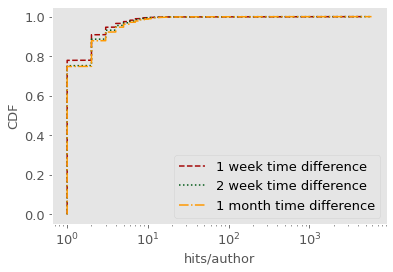

In [1107]:
plot_cdf([onewresults, twowresults, onemresults], 'hits/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_hits_per_author_for_varying_td.pdf', islogx=True)

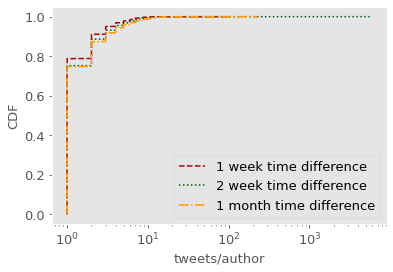

In [1160]:
plot_cdf([onewresults, twowresults, onemresults], 'tweets/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_tweets_per_author_for_varying_td.pdf', islogx=True)

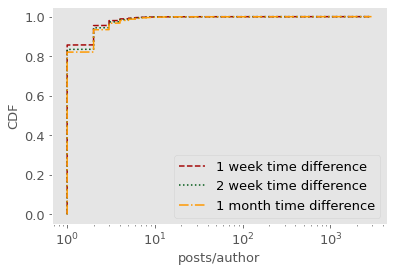

In [1170]:
plot_cdf([onewresults, twowresults, onemresults], 'posts/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_posts_per_author_for_varying_td.pdf', islogx=True)

In [1197]:
onew = one_week_hits.groupby('author').count()
onew.shape

(18185, 7)

In [1240]:
owr = onew[onew['td']!=1]['td'].to_list()

In [1241]:
len(owr)

4431

In [1245]:
df1 = onew[onew['td']!=1].index.tolist()
fow = one_week_hits[one_week_hits['author'].isin(df1)]
print(fow.shape)
owr = fow.groupby('author').nunique()

(23129, 8)


In [1179]:
twow = two_week_hits.groupby('author').count()
twow.shape

(25766, 7)

In [1181]:
twr = twow[twow['td']!=1]['td'].to_list()
len(twr)

7079

In [1282]:
df1 = twow[twow['td']!=1].index.tolist()
fow = two_week_hits[two_week_hits['author'].isin(df1)]
print(fow.shape)
twr = fow.groupby('author').nunique()

(35060, 8)


In [1182]:
onem = one_month_hits.groupby('author').count()
onem.shape

(52399, 7)

In [1183]:
omr = onem[onem['td']!=1]['td'].to_list()
len(omr)

14889

In [1298]:
df1 = onem[onem['td']!=1].index.tolist()
fow = one_month_hits[one_month_hits['author'].isin(df1)]
print(fow.shape)
omr = fow.groupby('author').nunique()

(71629, 8)


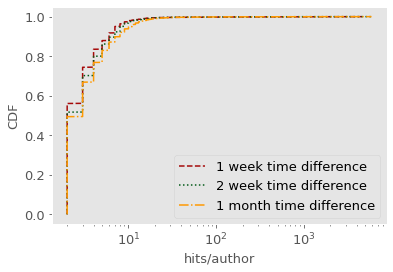

In [1186]:
plot_cdf([owr, twr, omr], 'hits/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_hits_per_author_for_varying_td_filtered.pdf', islogx=True)

(18185, 7)
(25766, 7)
25766
(52399, 7)
52399


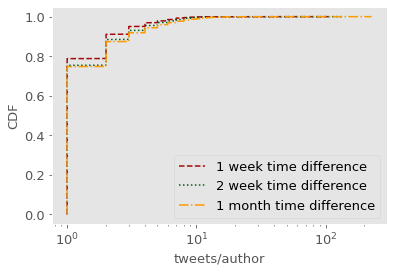

In [1187]:
onew = one_week_hits.groupby('author').nunique()
print(onew.shape)
owr = onew['tweet_id'].to_list()
twow = two_week_hits.groupby('author').nunique()
print(twow.shape)
twr = twow['tweet_id'].to_list()
print(len(twr))
onem = one_month_hits.groupby('author').nunique()
print(onem.shape)
omr = onem['tweet_id'].to_list()
print(len(omr))
plot_cdf([owr, twr, omr], 'tweets/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_tweets_per_author_for_varying_td_filtered.pdf', islogx=True)

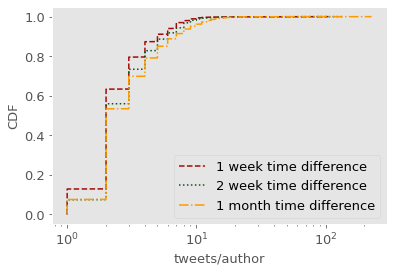

In [1234]:
plot_cdf([owr['tweet_id'].tolist(), twr['tweet_id'].tolist(), omr['tweet_id'].tolist()], 'tweets/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_tweets_per_author_for_varying_td_filtered.pdf', islogx=True)

(18185, 7)
(25766, 7)
25766
(52399, 7)
52399


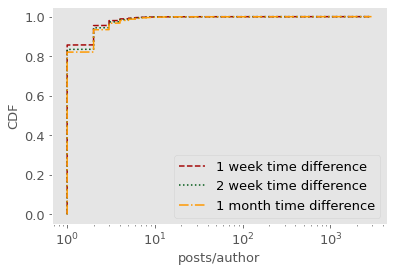

In [1189]:
onew = one_week_hits.groupby('author').nunique()
print(onew.shape)
owr = onew['post_id'].to_list()
twow = two_week_hits.groupby('author').nunique()
print(twow.shape)
twr = twow['post_id'].to_list()
print(len(twr))
onem = one_month_hits.groupby('author').nunique()
print(onem.shape)
omr = onem['post_id'].to_list()
print(len(omr))
plot_cdf([owr, twr, omr], 'posts/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_posts_per_author_for_varying_td_filtered.pdf', islogx=True)

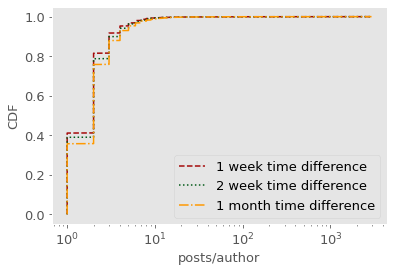

In [1235]:
plot_cdf([owr['post_id'].tolist(), twr['post_id'].tolist(), omr['post_id'].tolist()], 'posts/author',leg=['1 week time difference', '2 week time difference', '1 month time difference'], path = './cdf_of_posts_per_author_for_varying_td_filtered.pdf', islogx=True)

# Most frequently occuring tweets within one weel time difference

In [1299]:
frequent_tweets = fow.groupby('tweet_id').count()

In [1300]:
frequent_tweets_df = pd.DataFrame()

In [1301]:
frequent_tweets_df['tweet_id'] = frequent_tweets.index.tolist()

In [1302]:
frequent_tweets_df['count'] = frequent_tweets.post_id.tolist()

In [1303]:
frequent_tweets_df.shape

(964, 2)

In [1304]:
frequent_tweets_df = frequent_tweets_df.sort_values(by=['count'], ascending=False)

In [1305]:
related_data = data[data['tweetid'].isin(frequent_tweets_df['tweet_id'].tolist())]

In [1306]:
related_data.shape

(1019, 31)

In [1307]:
texts = []
for i in frequent_tweets_df['tweet_id'].to_list():
    texts.append((related_data[related_data['tweetid'] == i]['tweet_text'].values)[0])

In [1308]:
len(texts)

964

In [1309]:
frequent_tweets_df['tweet_text'] = texts

In [1310]:
frequent_tweets_df.head(100)

,tweet_id,count,tweet_text
312,798538921135181824,4937,One more way to #MakeAmericaGreatAgain https://t.co/i8pAbBQ8Og
266,796056051246366725,3630,@realDonaldTrump I vote #TrumpForPresident
281,796122147580166148,3193,time to #MakeAmericaGreatAgain #TrumpForPresident
258,795447093854769152,2556,LIES!!! #CrookedHillary https://t.co/waieEkxWF3
290,796266640753225728,2409,Trump wins White House in astonishing victory https://t.co/XBEeZpYk6F https://t.co/EObi2rBK7X
931,864788245736865793,2321,@Major_Daye It needs to be killed! Period the end
158,786518446406180868,2087,Washington Post Endorses Hillary Clinton for President https://t.co/jU5lYbqWDg
242,793119132912877574,1581,Hillary Clinton photo illustrates pathological lying in Google results https://t.co/Bqm5RkK7xp
307,797896909041987584,1481,"No, she deserves to be in prison! #HillaryForPrison https://t.co/w8uCbssXBw"
72,779723003131297796,1442,N.Y. Times endorses Hillary Clinton for president https://t.co/P8rtTHkl9Z


In [1311]:
frequent_tweets_df = frequent_tweets_df.rename(columns={'count': 'frequency'})

In [1312]:
frequent_tweets_df.to_csv('./results/frequent_tweets_one_month_td_for_authors_with_multiple_hits.csv')